<a href="https://colab.research.google.com/github/ManojKesani/100-Days-Of-ML-Code/blob/master/GD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
X = np.array([0.5,2.3,2.9])
Y = np.array([1.4,1.9,3.2])
x_tick = np.arange(0,5,0.01)

In [ ]:
def fun(x,m,c):
  # print('hi')
  y = m*x+c

  return y

y_l = fun(x_tick,0.64,1)

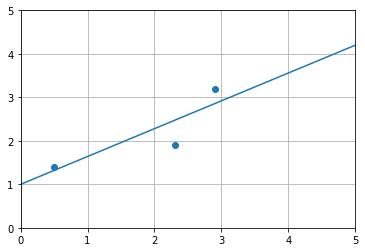

In [ ]:
plt.scatter(X,Y)
plt.plot(x_tick,y_l)
plt.xlim(0,5)
plt.ylim(0,5)
plt.grid()

In [ ]:
m = 0.64
e_y = []
e_x = np.arange(-5,5,0.01)
for c in e_x :
  # c = 1
  err = 0
  for x,y in zip(X,Y):
    y1 = fun(x,m,c)

    err += (y1-y)**2
  e_y.append(err)
    #
print(e)

[4.3264000000000005, 6.365584, 11.859920000000002, 4.2848999999999995, 6.295623999999999, 11.743180000000002, 4.243599999999998, 6.226063999999997, 11.62704, 4.2025, 6.156903999999999, 11.511499999999998, 4.1616, 6.088144, 11.396560000000001, 4.120899999999999, 6.019783999999999, 11.28222, 4.080399999999998, 5.9518239999999984, 11.168479999999999, 4.040099999999999, 5.884263999999998, 11.055339999999998, 3.999999999999999, 5.817103999999999, 10.9428, 3.9600999999999993, 5.750343999999999, 10.830860000000001, 3.920399999999999, 5.683983999999999, 10.71952, 3.880899999999999, 5.618023999999998, 10.60878, 3.841599999999999, 5.552463999999999, 10.49864, 3.802499999999999, 5.487303999999998, 10.3891, 3.763599999999999, 5.4225439999999985, 10.280159999999999, 3.724899999999999, 5.358183999999999, 10.171819999999999, 3.686399999999999, 5.294223999999998, 10.064079999999999, 3.648099999999999, 5.230663999999998, 9.95694, 3.609999999999999, 5.167503999999998, 9.850399999999999, 3.57209999999999

In [ ]:
# len(e_x)
len(e_y)

1000

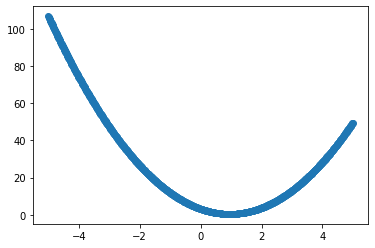

In [ ]:
plt.scatter(e_x,e_y)

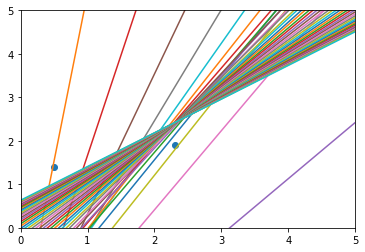

In [80]:
m = 15
c = 0
lr = 0.05

def loss_fun(X,Y,m,c):
  l = 0
  for x,y in zip(X,Y):
    y1 = fun(x,m,c)
    l += (y-y1)**2

  return l


def dloss_fun_C(X,Y,m = 0.64,c = 0):
  s = 0
  for x,y in zip(X,Y):
    y1 = fun(x,m,c)
    s += 2*(y1-y)
  return s

def dloss_fun_M(X,Y,m = 0.64,c = 0):
  s = 0
  for x,y in zip(X,Y):
    y1 = fun(x,m,c)
    s += 2*(y1-y)*x
  return s

l = []
for i in range(50):
  # print('hi')
  loss = loss_fun(X,Y,m,c)
  step_C = dloss_fun_C(X,Y,m,c)
  step_M = dloss_fun_M(X,Y,m,c)
  c = c - lr*step_C
  m = m - lr*step_M

  l.append(loss)
  x_tick = np.arange(0,5,0.01)
  y_l = fun(x_tick,m,c)
  plt.plot(x_tick,y_l)
  
  plt.xlim(0,5)
  plt.ylim(0,5)
  plt.grid()

plt.scatter(X,Y)

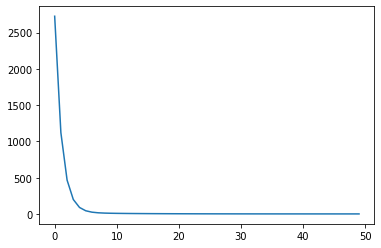

In [86]:
plt.plot(np.arange(0,50),l)

In [85]:
(loss).shape

()